In [1]:
# Univariate and Bivariate Analysis in Python

# Import necessary libraries
import pandas as pd         # For data manipulation
import numpy as np          # For numerical computations
import seaborn as sns       # For visualization
import matplotlib.pyplot as plt  # For plotting
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# Set the style for plots
sns.set_style("whitegrid")

# Load the dataset
df = pd.read_csv("zomato_dataset.csv")

# Display the first few rows of the dataset
df.head()

,Restaurant Name,Rating,Cuisine,Average Price,Average Delivery Time,Safety Measure,Location
0,Campus Bakers,4.3,"Bakery, Fast Food, Pizza, Sandwich, Burger",₹50 for one,36 min,Restaurant partner follows WHO protocol,Agra
1,Mama Chicken Mama Franky House,4,"North Indian, Mughlai, Rolls, Burger, Momos",₹50 for one,22 min,Follows all Max Safety measures to ensure your...,Agra
2,GMB - Gopika Sweets & Restaurant,4.2,"North Indian, South Indian, Chinese, Fast Food...",₹50 for one,27 min,Follows all Max Safety measures to ensure your...,Agra
3,Shree Bankey Bihari Misthan Bhandar,4.2,"Mithai, Street Food, South Indian, Chinese, Ic...",₹50 for one,28 min,Restaurant partner follows WHO protocol,Agra
4,Burger King,4.2,"Burger, Fast Food, Beverages",₹50 for one,26 min,Follows all Max Safety measures to ensure your...,Agra


## Step 1: Data Overview

Before diving into analysis, let's inspect the dataset.

In [2]:
# Get basic information about the dataset
df.info()

# Summary statistics of numerical variables
df.describe()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display data types of each column
print("\nData types of columns:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44891 entries, 0 to 44890
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Restaurant Name        44891 non-null  object
 1   Rating                 44891 non-null  object
 2   Cuisine                44872 non-null  object
 3   Average Price          44891 non-null  object
 4   Average Delivery Time  44891 non-null  object
 5   Safety Measure         44891 non-null  object
 6   Location               44891 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB

Missing values in each column:
Restaurant Name           0
Rating                    0
Cuisine                  19
Average Price             0
Average Delivery Time     0
Safety Measure            0
Location                  0
dtype: int64

Data types of columns:
Restaurant Name          object
Rating                   object
Cuisine                  object
Average Price            object


## Step 2: Univariate Analysis
1️. Distribution of Numerical Variables
We analyze each numerical column's distribution using histograms and kernel density estimation (KDE) plots.

In [14]:
# Plot histograms with KDE for numerical variables
df.select_dtypes(include=[np.number]).hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


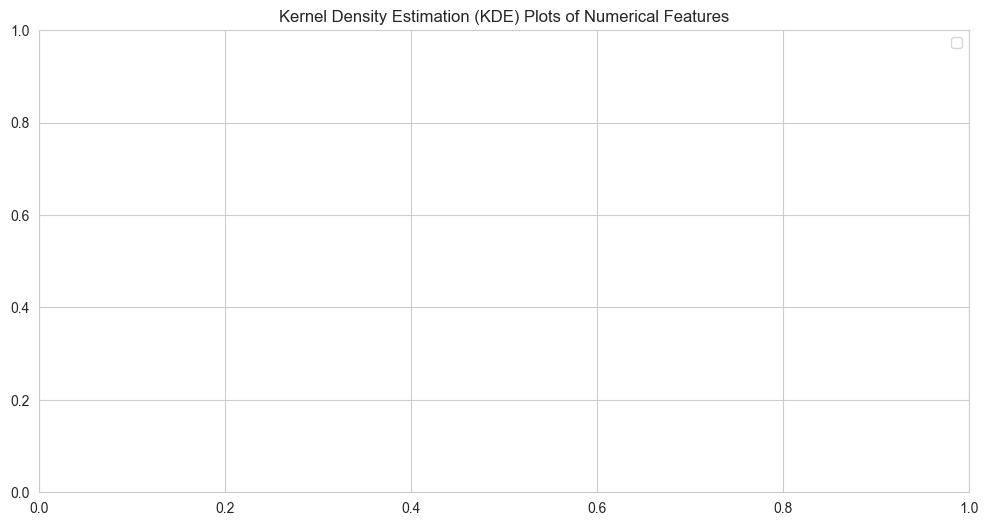

In [4]:
# KDE plots for numerical features
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=[np.number]).columns:
    sns.kdeplot(df[column], label=column, shade=True)
plt.title("Kernel Density Estimation (KDE) Plots of Numerical Features")
plt.legend()
plt.show()

2️. Box Plots (Detect Outliers)
Box plots help in identifying outliers.

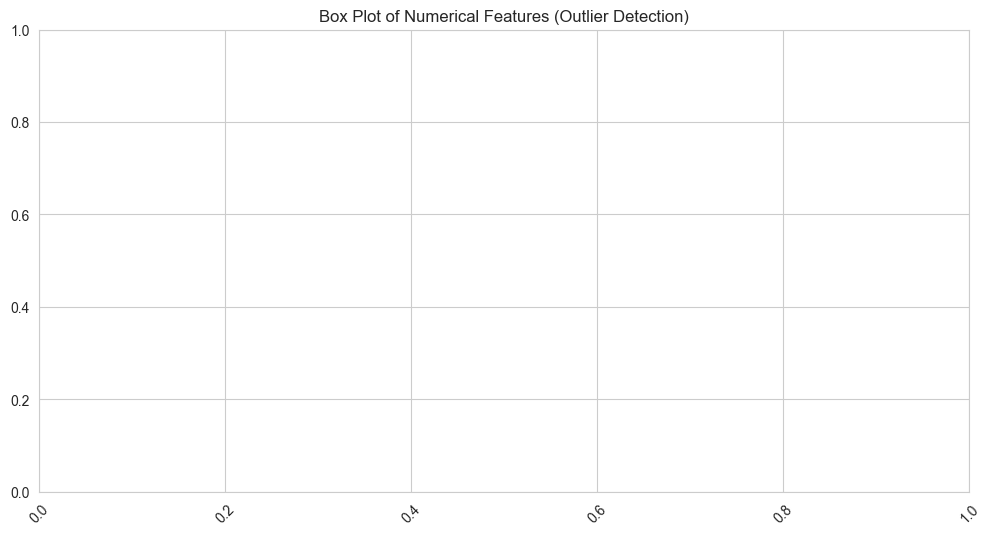

In [5]:
# Box plots for numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features (Outlier Detection)")
plt.show()

3️. Violin Plots (Distribution + Outliers)
Violin plots combine KDE plots with box plots

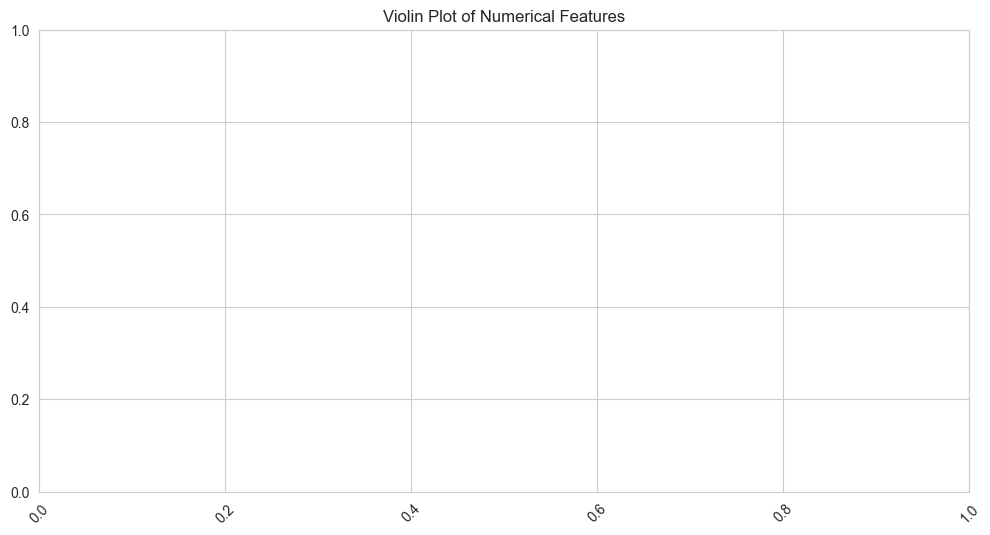

In [6]:
# Violin plot for numerical features
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.xticks(rotation=45)
plt.title("Violin Plot of Numerical Features")
plt.show()

4️. Count Plots for Categorical Variables
For categorical variables, count plots help visualize category distribution.

<Figure size 1200x600 with 0 Axes>

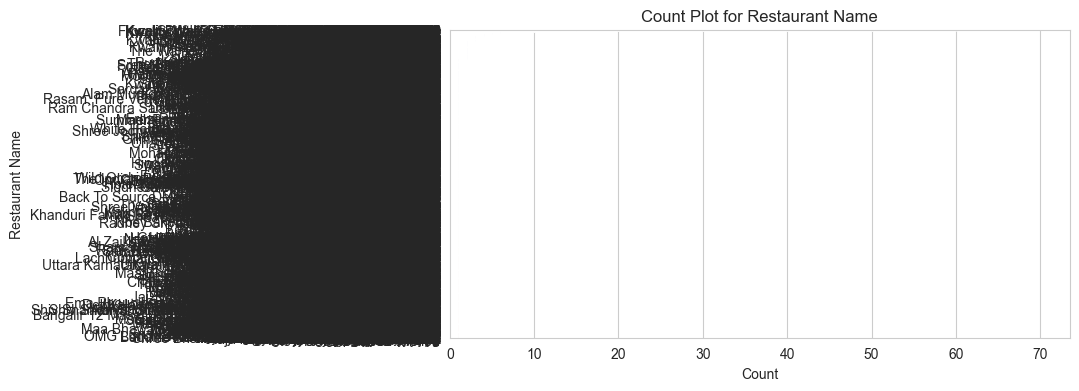

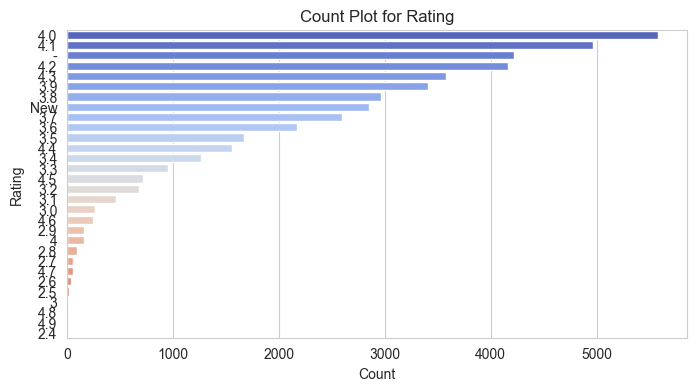

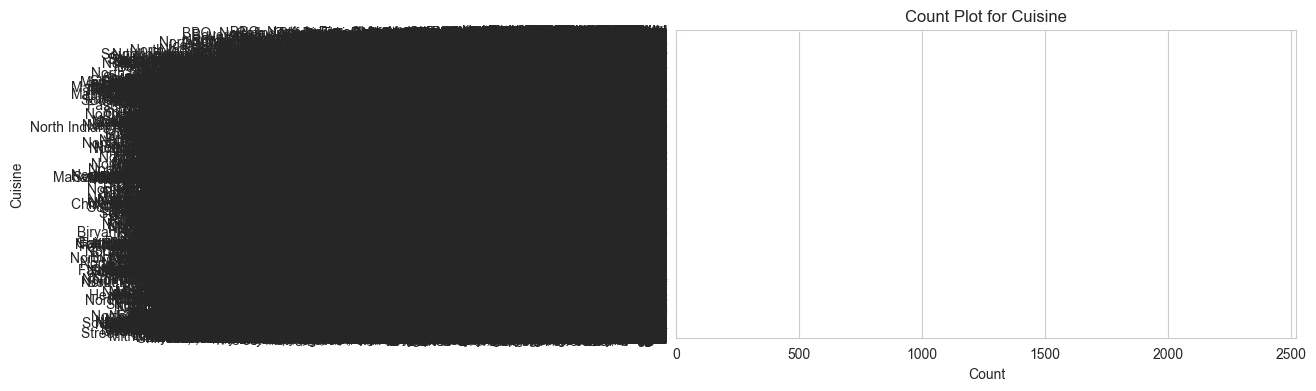

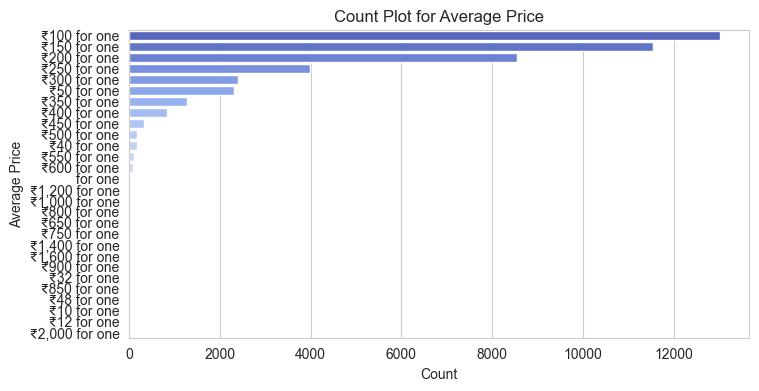

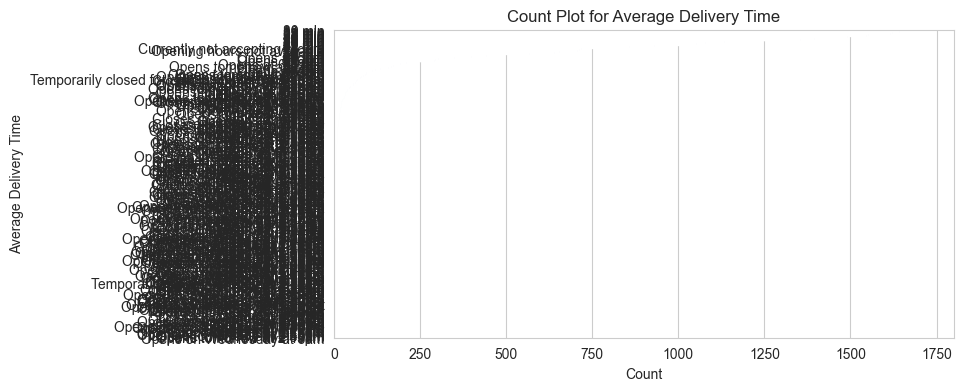

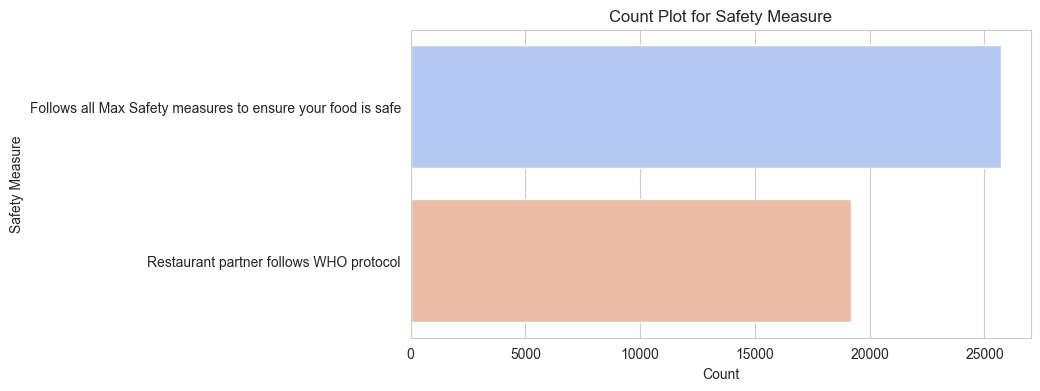

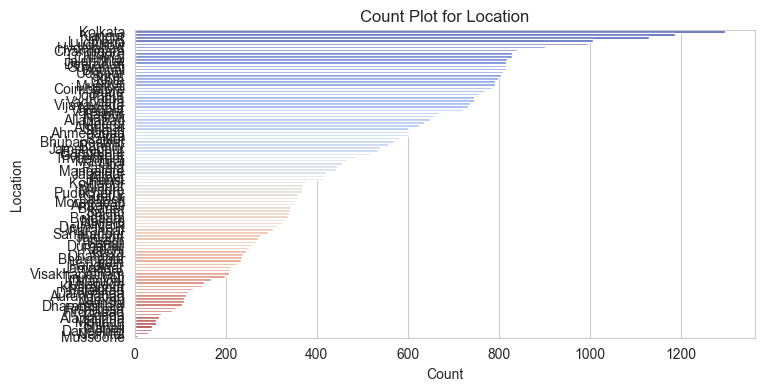

In [7]:
# Plot count plots for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns):
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
    plt.title(f"Count Plot for {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

## Step 3: Bivariate Analysis
1️. Correlation Matrix (Numerical Variables)
Heatmaps show the correlation between numerical features.

In [17]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numerical columns before plotting
if numeric_df.shape[1] > 0:  # Ensure there are numerical columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numerical columns found for correlation analysis.")


No numerical columns found for correlation analysis.


2️. Pair Plots (Visualizing Relationships)
Pair plots help visualize relationships between multiple numerical variables.

In [19]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Check if numerical columns are available before plotting
if numeric_df.shape[1] > 1:  # Pairplot requires at least two numerical variables
    sns.pairplot(numeric_df)
    plt.show()
else:
    print("Not enough numerical columns for pairplot visualization.")


Not enough numerical columns for pairplot visualization.


3️. Scatter Plots (Numerical vs Numerical)
Scatter plots show relationships between two numerical variables.

In [21]:
print(df.columns)  # Lists all available column names

Index(['Restaurant Name', 'Rating', 'Cuisine', 'Average Price',
       'Average Delivery Time', 'Safety Measure', 'Location'],
      dtype='object')


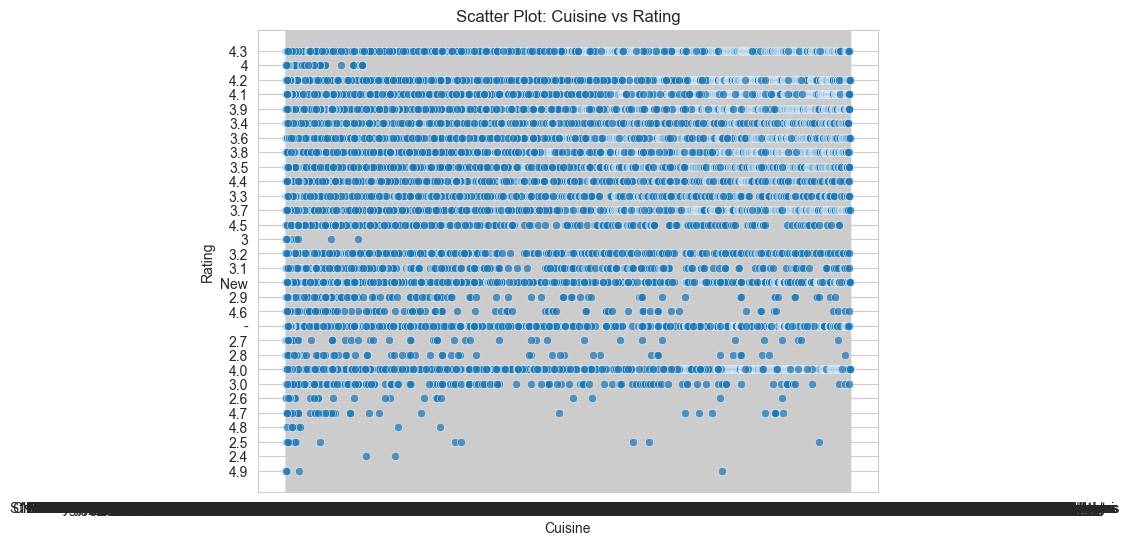

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Cuisine"], y=df["Rating"], alpha=0.7)
plt.title("Scatter Plot: Cuisine vs Rating")
plt.xlabel("Cuisine")
plt.ylabel("Rating")
plt.show()

4️. Box Plots (Categorical vs Numerical)
Box plots help analyze the distribution of numerical values across different categories.

In [25]:
print(df.columns)  # Lists all available column names

Index(['Restaurant Name', 'Rating', 'Cuisine', 'Average Price',
       'Average Delivery Time', 'Safety Measure', 'Location'],
      dtype='object')


In [26]:
# Replace 'categorical_column' and 'numerical_column' with actual column names
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Cuisine"], y=df["Rating"], palette="Set2")
plt.xticks(rotation=45)
plt.title("Box Plot: Cuisine vs Rating")
plt.show()

KeyboardInterrupt: 

5️. Violin Plots (Categorical vs Numerical)
Violin plots combine KDE with box plots for category-wise numerical analysis.

In [ ]:
# Violin plot for categorical vs numerical feature
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["Cuisine"], y=df["Rating"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Violin Plot: Cuisine vs Rating")
plt.show()

KeyError: 'categorical_column'

<Figure size 1000x600 with 0 Axes>

6️. Bar Plots (Categorical vs Numerical Aggregation)
Bar plots help analyze the mean/median of numerical features for different categories.

In [ ]:
# Bar plot of categorical variable vs numerical variable (mean)
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Cuisine"], y=df["Rating"], estimator=np.mean, ci=None, palette="Blues")
plt.xticks(rotation=45)
plt.title("Bar Plot: Mean of Rating by Cuisine")
plt.show()

KeyError: 'categorical_column'

<Figure size 1200x600 with 0 Axes>

### **Summary of Findings**
- **Univariate Analysis:**
  - Histograms and KDE plots showed the distribution of numerical features.
  - Box plots and violin plots helped detect outliers.
  - Count plots revealed the frequency distribution of categorical variables.
  
- **Bivariate Analysis:**
  - Heatmaps identified highly correlated numerical features.
  - Scatter plots showed relationships between numerical variables.
  - Box and violin plots revealed category-wise variations in numerical features.
  - Bar plots summarized numerical variables based on categorical groupings.
  
- **Key Takeaways:**
  - Strong correlations between variables suggest potential feature engineering.
  - Outliers were detected in some numerical variables.
  - Certain categorical groups had significantly different numerical values.
  
- **Next Steps:**
  - Handle missing values if necessary.
  - Remove or transform outliers if they affect model performance.
  - Perform feature engineering based on insights.
